# Data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, auc, roc_curve

In [2]:
#from google.colab import files
#
#uploaded = files.upload()
#
#for fn in uploaded.keys():
#    print('User uploaded file "{name}" with length {length} bytes'.format(
#        name=fn, length=len(uploaded[fn])))

Saving diabetes.csv to diabetes.csv
User uploaded file "diabetes.csv" with length 23873 bytes


In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Statistics on sample labelling

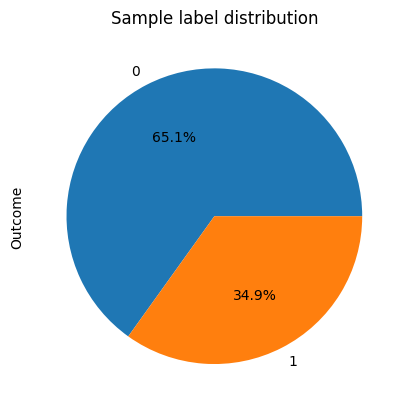

In [5]:
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Sample label distribution")
plt.show()

# Compare differences in characteristics

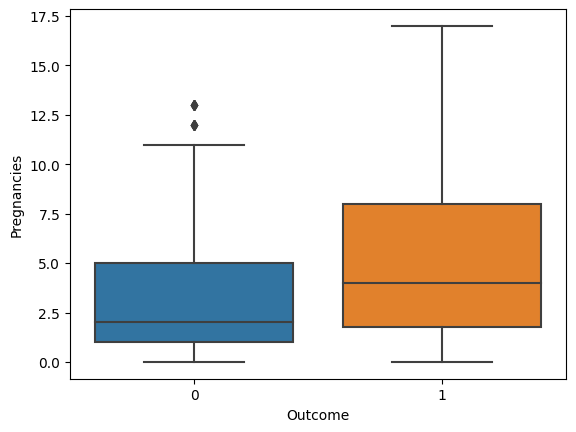

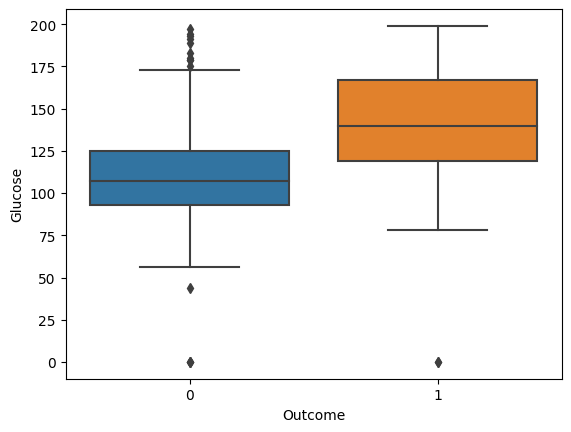

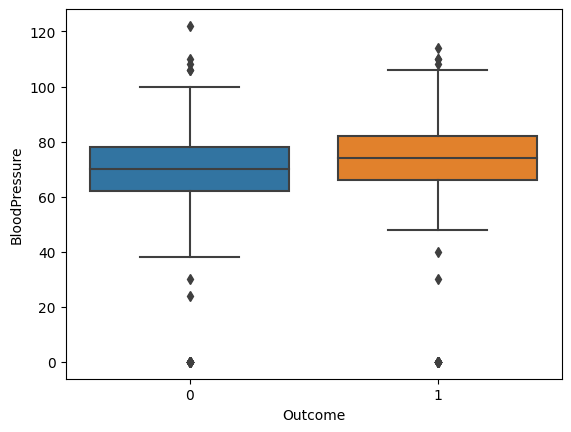

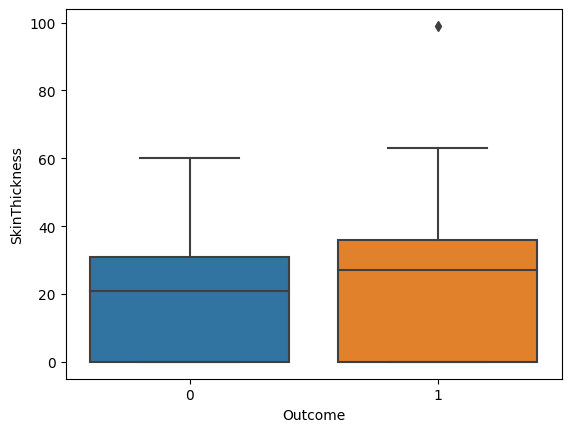

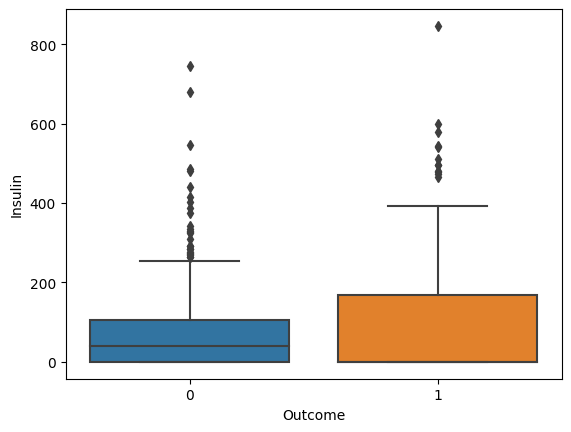

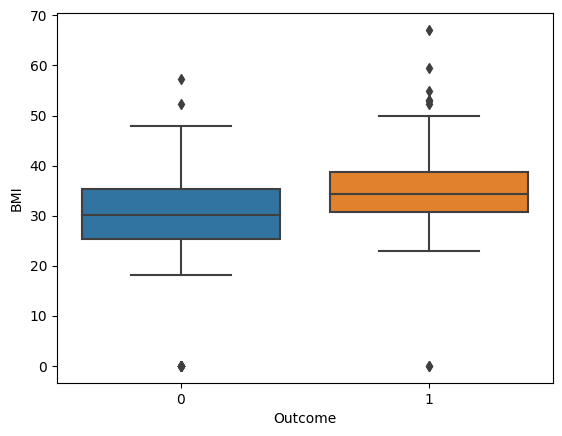

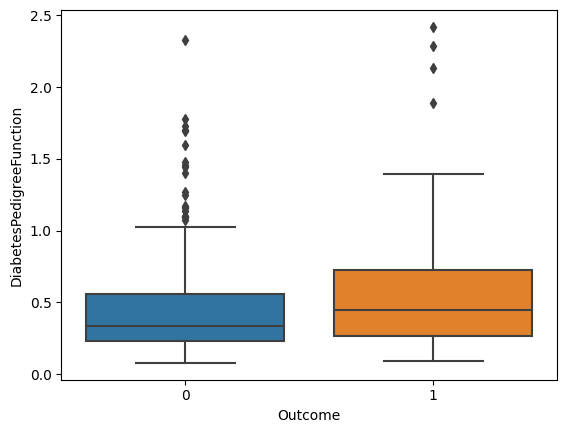

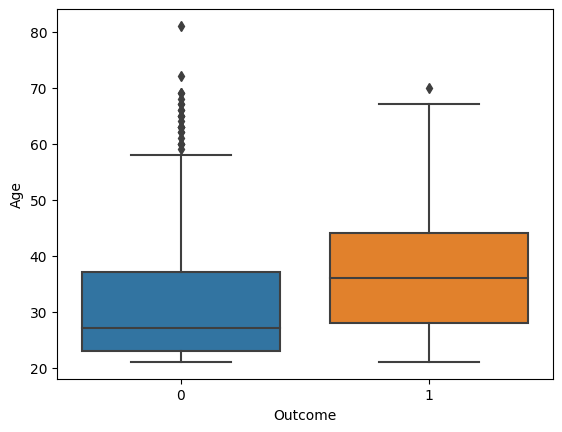

In [6]:
for col in df.columns[:-1]:
    sns.boxplot(x = 'Outcome', y = col, data = df)
    plt.show()

# Independent samples t-tests
# used to determine whether there were significant differences between diabetics and non-diabetics on each characteristic.

In [7]:
test_result = []
mask = df['Outcome'] == 1
for col in df.columns[:-1]:
    arr0 = df[col][~mask]
    arr1 = df[col][mask]
    res = ttest_ind(arr1, arr0)
    mean0 = arr0.mean()
    mean1 = arr1.mean()
    test_result.append([col, mean0, mean1, res.statistic, res.pvalue])
tTest_df = pd.DataFrame(test_result,
                        columns = ['feature', 'Group0', 'Group1', 'T-statistic','p-value'])
tTest_df.sort_values("p-value")

,feature,Group0,Group1,T-statistic,p-value
1,Glucose,109.980000,141.257463,14.600060,8.935432e-43
5,BMI,30.304200,35.142537,8.471840,1.229807e-16
7,Age,31.190000,37.067164,6.792688,2.209975e-11
0,Pregnancies,3.298000,4.865672,6.298431,5.065127e-10
6,DiabetesPedigreeFunction,0.429734,0.550500,4.885826,1.254607e-06
4,Insulin,68.792000,100.335821,3.644325,2.861865e-04
3,SkinThickness,19.664000,22.164179,2.074700,3.834770e-02
2,BloodPressure,68.184000,70.824627,1.804702,7.151390e-02


#Divide the data into a training set and a test set

In [8]:
# 提取特征数据X 和 目标变量y
X = df.drop(['BloodPressure',"Outcome"], axis = 1) # 提出特征BloodPressure和目标变量Outcome就是 X的数据
y = df['Outcome']

# 以8:2的比例划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,y ,train_size=0.8, random_state=11)

# 对数据集进行归一化处理
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scalered = scaler.transform(X_train)
X_test_scalered = scaler.transform(X_test)

#Implement a perceptron（a single layer perceptron）

In [9]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def train_model(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert labels to -1 and 1 for the perceptron algorithm
        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.where(linear_output >= 0, 1, -1)
                update = self.learning_rate * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def make_prediction(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

# Training the Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.train_model(X_train_scalered, y_train)

# Testing the Perceptron
y_pred = perceptron.make_prediction(X_test_scalered)
accuracy = accuracy_score(y_test, y_pred)

accuracy



0.7077922077922078

#Implement a multilayer perceptron with one single-hidden-layer

In [10]:
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(SimpleMLP, self).__init__()

        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, 1)  # 用于二分类任务

        self.activation = nn.ReLU()
#         self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.hidden(x))
        return self.activation(self.output(x))

In [11]:
# 将数据转换为 tensor格式
X_train_tensor = torch.tensor(X_train_scalered, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1) #使其成为列向量

X_test_tensor = torch.tensor(X_test_scalered, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)  #使其成为列向量


In [12]:
# 设置随机种子，使得在不同机器上执行的结果一致
torch.manual_seed(3)

# 初始化网络模型
model = SimpleMLP(input_dim=X.shape[1], hidden_dim=128)

# 使用二分类交叉熵作为 损失函数
criterion = nn.BCELoss()

# 使用 随机梯度下降 方法来估计模型参数，学习率为0.01
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_history = []
num_epochs = 500 # 迭代训练500轮
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss_history.append(loss.item())
    loss.backward()
    optimizer.step()

In [13]:
# 模型预测，对测试集进行评估
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = (y_pred > 0.5).float()
    accuracy = (y_pred_class == y_test_tensor).float().mean()
    print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7273


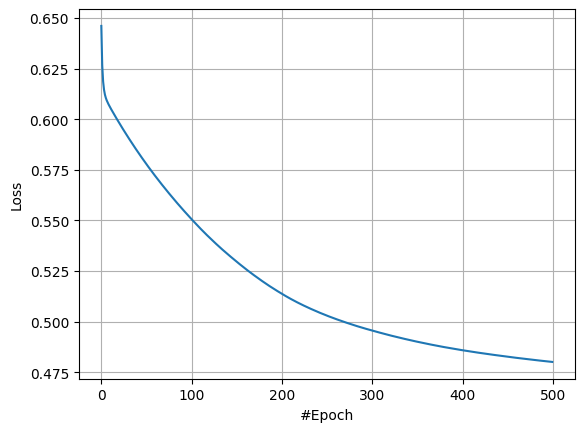

In [14]:
# 算法每次训练时的损失
plt.plot(loss_history)
plt.xlabel("#Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

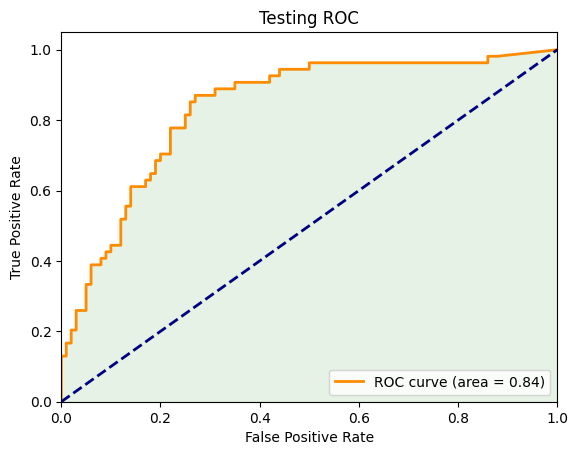

In [15]:
# 绘制ROC曲线
fpr,tpr,threshold = roc_curve(y_test, y_pred)
test_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr, tpr, where=(tpr>0), color='green', alpha=0.1)
plt.title('Testing ROC')
plt.legend(loc="lower right")

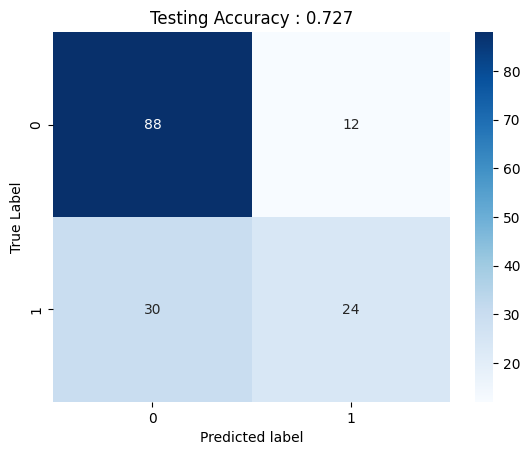

In [16]:
# 绘制混淆矩阵
test_confusion_matrix = confusion_matrix(y_test, y_pred_class)
sns.heatmap(test_confusion_matrix, annot=True, fmt='.20g', cmap = plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Testing Accuracy : {:.3f}".format(accuracy))
plt.show()

#Implement multi-layer perceptron with double-hidden-layer

In [17]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden1_dim, hidden2_dim):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(input_dim, hidden1_dim)
        self.hidden2 = nn.Linear(hidden1_dim, hidden2_dim)
        self.output = nn.Linear(hidden2_dim, 1)  # 用于二分类任务
        self.activation = nn.ReLU()
#         self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.hidden1(x))
        x = self.activation(self.hidden2(x))
        return self.activation(self.output(x))

In [18]:
clf = MLP(X.shape[1],128,256)
# 使用二分类交叉熵作为 损失函数
criterion = nn.BCELoss()

torch.manual_seed(3)

# 使用 随机梯度下降 方法来估计模型参数，学习率为0.01
optimizer = optim.SGD(clf.parameters(), lr=0.01)
loss_history = []
num_epochs = 500 # 迭代训练500轮
for epoch in range(num_epochs):
    clf.train()
    optimizer.zero_grad()
    outputs = clf(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss_history.append(loss.item())
    loss.backward()
    optimizer.step()

In [19]:
# 模型预测，对测试集进行评估
clf.eval()
with torch.no_grad():
    y_pred = clf(X_test_tensor)
    y_pred_class = (y_pred > 0.5).float()
    accuracy = (y_pred_class == y_test_tensor).float().mean()
    print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7662


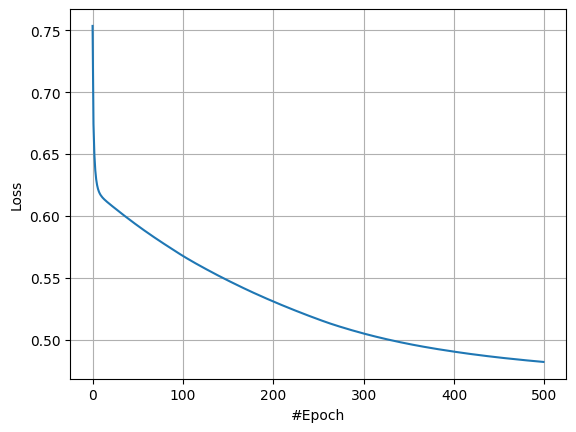

In [20]:
# 算法每次训练时的损失
plt.plot(loss_history)
plt.xlabel("#Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

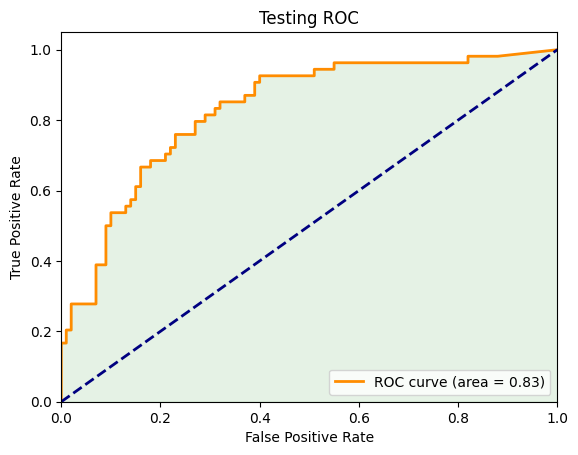

In [21]:
# 绘制ROC曲线
fpr,tpr,threshold = roc_curve(y_test, y_pred)
test_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr, tpr, where=(tpr>0), color='green', alpha=0.1)
plt.title('Testing ROC')
plt.legend(loc="lower right")

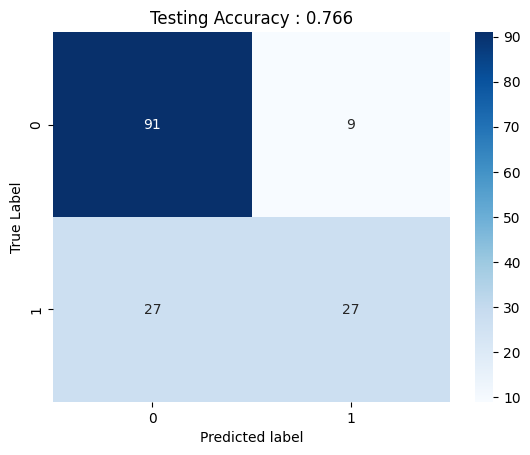

In [22]:
# 绘制混淆矩阵
test_confusion_matrix = confusion_matrix(y_test, y_pred_class)
sns.heatmap(test_confusion_matrix, annot=True, fmt='.20g', cmap = plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Testing Accuracy : {:.3f}".format(accuracy))
plt.show()